## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_data.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [2]:
# Checking the number of mice.
mice_number = combined_data["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"] != "g989"]

cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_number = cleaned_data["Mouse ID"].nunique()
cleaned_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Groupby Drug Regimen
drug_data = cleaned_data.groupby(["Drug Regimen"])

# Mean Tumor Volume
drug_data_mean= drug_data["Tumor Volume (mm3)"].mean()

# Median Tumor Volume
drug_data_median = drug_data["Tumor Volume (mm3)"].median()

# Variance Tumor Volume
drug_data_variance = drug_data["Tumor Volume (mm3)"].var()

# Standard Deviation Tumor Volume
drug_data_standard_dev = drug_data["Tumor Volume (mm3)"].std()

# SEM Tumor Volume
drug_data_sem = drug_data["Tumor Volume (mm3)"].sem()

# Summary of Tumor Data
drug_summary_analysis = pd.DataFrame({"Tumor Volume (mm3) Mean": drug_data_mean,
                                 "Tumor Volume (mm3) Median": drug_data_median,
                                 "Tumor Volume (mm3) Variance": drug_data_variance,
                                 "Tumor Volume (mm3) Standard Deviation": drug_data_standard_dev,
                                 "Tumor Volume (mm3) SEM": drug_data_sem})

drug_summary_analysis

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line

summary_data = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

summary_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

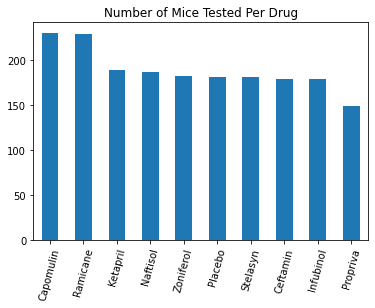

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Calculate the number of mice on each drug
mice_drugs = cleaned_data["Drug Regimen"].value_counts()

# Create a barplot that will show the number of mice on each drug
testing_plot = mice_drugs.plot.bar(title = "Number of Mice Tested Per Drug", rot=75)




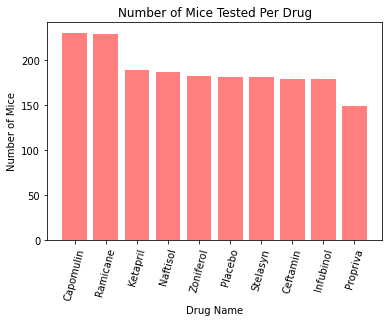

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(0, len(cleaned_data["Drug Regimen"].unique()))
mice_tested = cleaned_data["Drug Regimen"].value_counts()

plt.title("Number of Mice Tested Per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice")

plt.bar(mice_tested.index.values, mice_tested.values, facecolor = "red", alpha = 0.5, align="center")
plt.xticks(rotation=75)
plt.show()


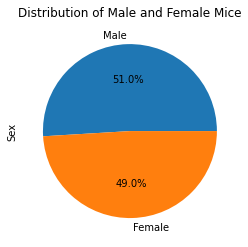

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex = cleaned_data["Sex"].value_counts()


plot = mice_sex.plot.pie(y="Sex", title="Distribution of Male and Female Mice", autopct="%1.1f%%")


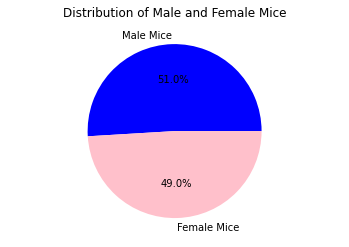

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = cleaned_data["Sex"].value_counts()
colors = ["blue", "pink"]
labels = ["Male Mice", "Female Mice"]
plt.title("Distribution of Male and Female Mice")
plt.axis("equal")
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", colors=colors)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
#greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_at_max_tp = pd.merge(greatest_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how ='inner')
tumor_at_max_tp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [205]:
#max_mice_timepoints = cleaned_data.loc[cleaned_data.groupby('Mouse ID')['Timepoint'].idxmax(), :].reset_index()
#max_mice_timepoints

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drugs_list:
    tumor = tumor_at_max_tp.loc[tumor_at_max_tp["Drug Regimen"] == drug,'Tumor Volume (mm3)']
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(tumor)
    
    #print(tumor)
    #print(tumor_volume)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq, 2)
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    #outliers = [x for x in tumor['Tumor Volume (mm3)'] if (x > upper_bound) | (x < lower_bound)]
    outliers = tumor.loc[(tumor<lower_bound) | (tumor>upper_bound)]
    #print(outliers)
    print(f'Possible outliers for {drug} are {outliers}.')
    
    # add subset 
     


Possible outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64).
Possible outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64).
Possible outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Possible outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64).


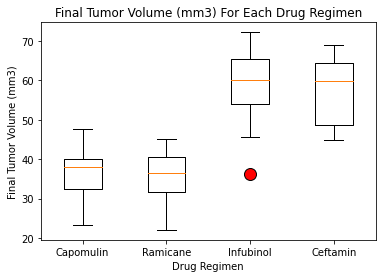

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_out = dict(markerfacecolor = 'red', markersize = 12)

plt.boxplot(tumor_vol, labels=drugs_list, flierprops = red_out)

plt.title("Final Tumor Volume (mm3) For Each Drug Regimen")
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel("Drug Regimen");

plt.show()

## Line and Scatter Plots

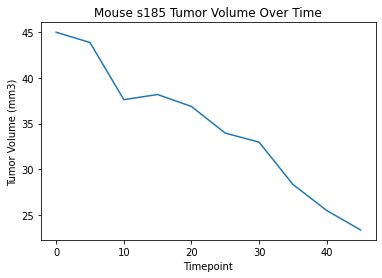

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
capomulin
mouse_id = capomulin.loc[capomulin['Mouse ID']== "s185"]
plt.plot(mouse_id["Timepoint"], mouse_id['Tumor Volume (mm3)'])
plt.title("Mouse s185 Tumor Volume Over Time")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Timepoint");

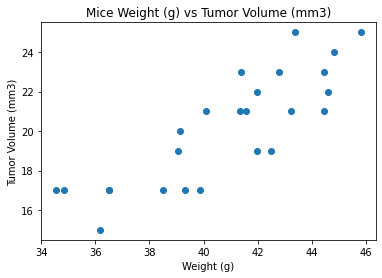

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol = capomulin.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
merged_df = pd.merge(mouse_metadata, avg_tumor_vol, on = 'Mouse ID')
plt.scatter(merged_df['Tumor Volume (mm3)'], merged_df['Weight (g)'])
plt.title("Mice Weight (g) vs Tumor Volume (mm3)")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Weight (g)");


## Correlation and Regression

Correlation is 0.842 and r-squared is 0.71.


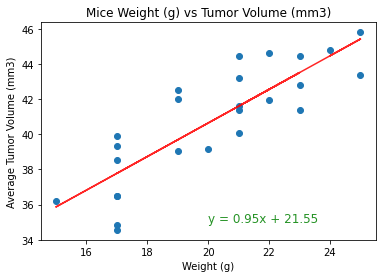

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = merged_df["Weight (g)"]
y = merged_df['Tumor Volume (mm3)']
corr = st.pearsonr(x, y)
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x, y)
m_fit = m_slope * x + m_int
line_fit = f"y = {round(m_slope, 2)}x + {round(m_int, 2)}"
print(f"Correlation is {round(corr[0], 3)} and r-squared is {round(m_r**2, 2)}.")
plt.scatter(x, y)
plt.plot(x, m_fit, "r-", alpha=0.85)
plt.annotate(line_fit, (20, 35), fontsize=12, color = "green", alpha = 0.85)
plt.title("Mice Weight (g) vs Tumor Volume (mm3)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel("Weight (g)");